In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [26]:
df=pd.read_csv('C:\\Users\\USER\\Desktop\\lotanasa\\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [28]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [31]:
df=(df-df.mean())/df.std()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1.365006
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,-0.731643
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1.365006
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,-0.731643
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1.365006


In [33]:
x=df['Insulin']
y=df['BloodPressure']


In [34]:
import seaborn as sns

C:\Users\USER\ANACONDA\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


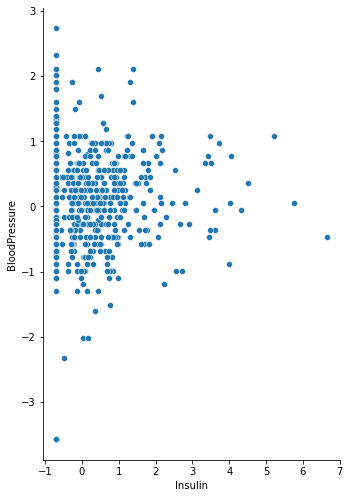

In [36]:
sns.pairplot(df,x_vars='Insulin',y_vars='BloodPressure',size=7,aspect=0.7,kind='scatter')

In [37]:
import numpy as np
x=np.array(x)
y=np.array(y)

In [60]:
def gradient(x,y,n_current=0,c_current=0,iters=1000,learning_rate=0.01):
    N=float(len(y))
    gd_df=pd.DataFrame(columns=['n_current','c_current','cost'])
    for i in range (iters):
        y_current=(n_current*x)+c_current
        cost=sum([data**2 for data in(y-y_current)])/N
        n_gradient=-(2/N)*sum(x*(y-y_current))
        c_gradient=-(2/N)*sum(y-y_current)
        n_current=n_current-(learning_rate*n_gradient)
        c_current=c_current-(learning_rate*c_gradient)
        gd_df.loc[1]=[n_current,c_current,cost]
    return(gd_df)   

In [62]:
gradients=gradient(x,y)
gradients

,n_current,c_current,cost
1,0.088933,1.543000e-17,0.990799


<AxesSubplot:xlabel='index'>

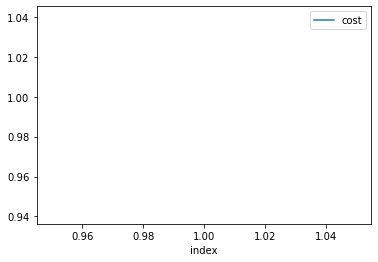

In [63]:
gradients.reset_index().plot.line(x='index',y=['cost'])

In [73]:
x=df['Insulin']
y=df['Age']

In [78]:
x['intercept']=1
x=x.reindex(['intercept','Insulin'],axis=1)
x.head()

intercept    1.0
Insulin      NaN
Name: Insulin, dtype: float64